**Zadanie 1**

Zbiór danych: `zamowienia.csv`

Bazując na przykładzie z wykresem plotly typu sunburst dla dwóch cech: `Kraj` oraz `Sprzedawca` stwórz wykresy tego samego typu:
* z rozkładem wartości dla cechy `Kraj` oraz roku z cechy `Data zamowienia`
* z rozkładem wartości dla cechy `Sprzedawca` oraz roku z cechy `Data zamowienia`
* z rozkładem wartości dla cechy `Kraj`, roku oraz `Sprzedawcy`.

Dla ułatwienia całej operacji stwórz w ramce danych kolumnę, która zawierać będzie wartość `year` z kolumny `Data zamowienia` (w komórce, w której zbiór został wczytany została skonwertowana na typ datetime).

**Zadanie 2**

Zbiór danych: EUROSTAT `DEMO_GIND` (ten sam co w przykładach).

Odpowiedz na poniższe pytania dotyczące powyższego zbioru:

**2.1** Jak wygląda wykres zmiany średniej liczby ludności (indic_de = AVG) dla strefy Euro (geo = EA19)?

**2.2** Jak wygląda wskaźnik śmiertelności dla Polski w porównaniu z tym samym wskaźnikiem dla Niemiec, Czech, Francji oraz Szwecji? Wyświetl dane w postaci wykresu liniowego dla wielu serii.

**2.3** Jak wygląda struktura ludności 20 najludniejszych państw Unii Europejskiej za rok 2023? Dane wyświetl na wykresie kołowym z wykorzystaniem biblioteki plotly.

**2.4** Które 3 państwa mają najbardziej zbliżoną liczbę ludności do Polski biorąc pod uwagę rok 2023?

**2.5** Wyświetl wykres liniowy porównujący liczbę narodzin i śmierci (wykorzystaj bibliotekę plotly) dla Unii Europejskiej w latach 2007-2023. Tutaj należy złączyć dane z trzech cech geo w jeden wektor:

* [EU27_2020] - European Union - 27 countries (from 2020)
* [EU28] European Union - 28 countries (2013-2020)
* [EU27_2007] European Union - 27 countries (2007-2013)

Pamiętaj o odpowiedniej kolejności złączenia tych danych.

**Zadanie 3** *


**3.1** Wyświetl różnicę liczby ludności zarejestrowanej w styczniu każdego roku dla pierwszego i ostatniego pomiaru dla każdej wartości w kolumnie `geo`. Wartość wyświetl w postaci nominalnej i procentowej.
**3.2** W którym Państwie nastąpiła największa zmiana liczby ludności (odrzuć wartości w kolumnie `geo`, które nie wskazują na jedno konkretne państwo)?

\* raczej dość trudne

In [6]:
!pip install seaborn plotly plotly[express] anywidget

In [7]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# wczytujemy zbiór danych
df = pd.read_csv('/content/zamowienia.csv', sep=';')
# konwersja kolumny z datą
df['Data zamowienia'] = pd.to_datetime(df['Data zamowienia'])
df.head()

,Kraj,Sprzedawca,Data zamowienia,idZamowienia,Utarg
0,Polska,Kowalski,2003-07-16,10248,440.00
1,Polska,Sowiński,2003-07-10,10249,1863.40
2,Niemcy,Peacock,2003-07-12,10250,1552.60
3,Niemcy,Leverling,2003-07-15,10251,654.06
4,Niemcy,Peacock,2003-07-11,10252,3597.90


zadanie 1

In [9]:
# z rozkładem wartości dla cechy Kraj oraz roku z cechy Data zamowienia
df['year'] = df['Data zamowienia'].dt.year
fig = px.sunburst(df, path=['Kraj', 'year'], values='Utarg')
fig.show()

In [10]:
# z rozkładem wartości dla cechy Sprzedawca oraz roku z cechy Data zamowienia
df['year'] = df['Data zamowienia'].dt.year
fig = px.sunburst(df, path=['Sprzedawca', 'year'], values='Utarg')
fig.show()

In [11]:
# z rozkładem wartości dla cechy Kraj, roku oraz Sprzedawcy.
fig = px.sunburst(df, path=['Kraj', 'year', 'Sprzedawca'], values='Utarg')
fig.show()


zadanie 2

In [12]:
!pip install eurostat

In [13]:
import eurostat

toc = eurostat.get_toc()

In [14]:
for title, code, *rest in toc:
    print(f'{title}, {code}')

title, code
Distribution of digital platform workers (at least one hour in the last month) by working hours setting - experimental statistics, LFST_DPW_10
Distribution of digital platform workers (at least one hour in the last month) by price setting - experimental statistics, LFST_DPW_11
Percentage of employed adults having a second job by sex, age groups, number of children and age of the youngest child, LFST_HH2JCHI
Percentage of employed people having a second job by sex, age groups and household composition, LFST_HH2JTY
Number of adults by sex, age groups, number of children, age of youngest child and household composition (1 000), LFST_HHACEDAY
Number of adults by sex, age groups, number of children, age of youngest child and educational attainment level (1 000), LFST_HHACEDNC
Number of adults by sex, age groups, number of children, age of youngest child and working status (1 000), LFST_HHACWNC
Average number of persons per household by household composition, number of children a

In [15]:
toc_df = eurostat.get_toc_df()

In [16]:
toc_df.head(10)

,title,code,type,last update of data,last table structure change,data start,data end
0,Distribution of digital platform workers (at l...,LFST_DPW_10,dataset,2024-07-17T23:00:00+0200,2024-07-17T23:00:00+0200,2022,2022
1,Distribution of digital platform workers (at l...,LFST_DPW_11,dataset,2024-07-17T23:00:00+0200,2024-07-17T23:00:00+0200,2022,2022
2,Percentage of employed adults having a second ...,LFST_HH2JCHI,dataset,2025-04-15T11:00:00+0200,2025-04-15T11:00:00+0200,2006,2024
3,Percentage of employed people having a second ...,LFST_HH2JTY,dataset,2025-04-15T11:00:00+0200,2025-04-15T11:00:00+0200,2006,2024
4,"Number of adults by sex, age groups, number of...",LFST_HHACEDAY,dataset,2025-04-15T11:00:00+0200,2025-04-15T11:00:00+0200,2006,2024
5,"Number of adults by sex, age groups, number of...",LFST_HHACEDNC,dataset,2025-04-15T11:00:00+0200,2025-04-15T11:00:00+0200,2006,2024
6,"Number of adults by sex, age groups, number of...",LFST_HHACWNC,dataset,2025-04-15T11:00:00+0200,2025-04-15T11:00:00+0200,2006,2024
7,Average number of persons per household by hou...,LFST_HHANTYCH,dataset,2025-04-15T11:00:00+0200,2025-04-15T11:00:00+0200,2006,2024
8,Average number of persons per household by hou...,LFST_HHANWHTC,dataset,2025-04-15T11:00:00+0200,2025-04-15T11:00:00+0200,2006,2024
9,"Employment rate of adults by sex, age groups, ...",LFST_HHEREDCH,dataset,2025-04-15T11:00:00+0200,2025-04-15T11:00:00+0200,2006,2024


In [21]:
data = eurostat.get_data_df('DEMO_GIND')
data = data.rename(columns={r'geo\TIME_PERIOD': 'geo'})

<Axes: >

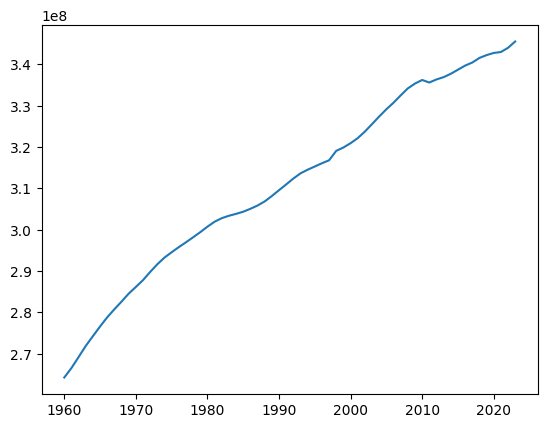

In [22]:
#2.1
num_cols = data.dtypes[data.dtypes == 'float64'].index.values
df = data[(data['indic_de'] == 'AVG') & (data['geo'] == 'EA19')].loc[:, num_cols].dropna(axis=1)
df.T.plot(legend=False)

<Axes: >

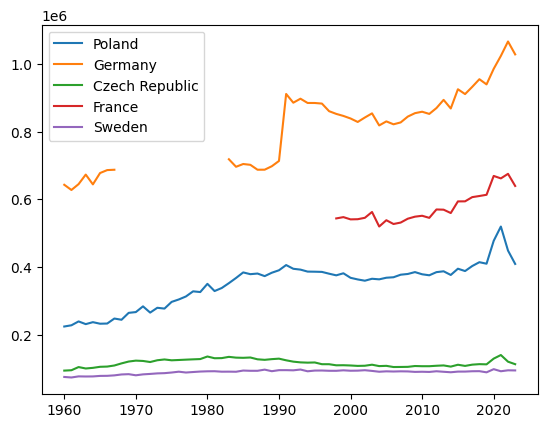

In [23]:
#2.2
df_pl = data[(data['indic_de'] == 'DEATH') & (data['geo'] == 'PL')].loc[:, num_cols]
df_de = data[(data['indic_de'] == 'DEATH') & (data['geo'] == 'DE')].loc[:, num_cols]
df_cz = data[(data['indic_de'] == 'DEATH') & (data['geo'] == 'CZ')].loc[:, num_cols]
df_fr = data[(data['indic_de'] == 'DEATH') & (data['geo'] == 'FR')].loc[:, num_cols]
df_se = data[(data['indic_de'] == 'DEATH') & (data['geo'] == 'SE')].loc[:, num_cols]
df_pl.rename(index={223:'Poland'}, inplace=True)
df_de.rename(index={189:'Germany'},inplace=True)
df_fr.rename(index={204:'France'},inplace=True)
df_se.rename(index={228:'Sweden'},inplace=True)
df_cz.rename(index={188:'Czech Republic'},inplace=True)
s = pd.concat([df_pl, df_de, df_cz, df_fr, df_se])
s.T.plot()

In [24]:
#2.3
geo = data[(data['indic_de'] == 'AVG')].T.iloc[2]
pop = data[(data['indic_de'] == 'AVG')].T.iloc[66]
plot_data = pd.merge(geo,pop, left_index=True, right_index=True)
top = plot_data.sort_values(by="2023",ascending=False)
top.drop(index=[24,16,15,13,20,18,19,23,25],inplace=True)
top20=top.head(20)
fig = px.pie(top20, values='2023', names='geo')
fig.show()

In [25]:
#2.4
pop_pl = top[(top['geo'] == 'PL')]
pop_pl = pop_pl['2023'].iloc[0]
top10 = top.head(10)
top10_no_pl = top10.drop(index=[46])
top10_no_pl = pd.merge(top10_no_pl['geo'],(top10_no_pl['2023'] - pop_pl).abs(), left_index=True, right_index=True)
top10_no_pl.sort_values(by='2023',ascending=True).head(3)

,geo,2023
22,ES,11665175.0
48,RO,17626291.0
44,NL,18810236.0


In [26]:
#2.5
geo_filter = ['EU27_2020', 'EU28', 'EU27_2007']
indicator_filter = ['LBIRTH', 'DEATH']


filtered = data[
    data['geo'].isin(geo_filter) &
    data['indic_de'].isin(indicator_filter)
]


long_df = filtered.melt(
    id_vars=['geo', 'indic_de'],
    var_name='year',
    value_name='value'
)


long_df['year'] = pd.to_numeric(long_df['year'], errors='coerce')
long_df = long_df.dropna(subset=['year', 'value'])
long_df['year'] = long_df['year'].astype(int)
long_df = long_df[(long_df['year'] >= 2007) & (long_df['year'] <= 2023)]


grouped = long_df.groupby(['year', 'indic_de'])['value'].sum().reset_index()


pivot = grouped.pivot(index='year', columns='indic_de', values='value').reset_index()


fig = px.line(
    pivot,
    x='year',
    y=['LBIRTH', 'DEATH'],
    labels={'value': 'Liczba osób', 'year': 'Rok', 'LBIRTH': 'Urodzenia', 'DEATH': 'Zgony'},
    title='Liczba urodzeń i zgonów w UE (2007–2023)'
)
fig.update_traces(mode='lines+markers')
fig.show()

zadanie 3

In [35]:
# 3.1

df_avg = data[data['indic_de'] == 'AVG'].copy()

id_vars_list = ['freq', 'indic_de', 'geo']
if 'unit' in df_avg.columns:
    id_vars_list.append('unit')

df_long = df_avg.melt(
    id_vars=id_vars_list,
    var_name='year',
    value_name='population'
)

df_long['year'] = pd.to_numeric(df_long['year'], errors='coerce')
df_long = df_long.dropna(subset=['year'])
df_long['year'] = df_long['year'].astype(int)

df_long = df_long.sort_values(by=['geo', 'year'])

first_measurement = df_long.groupby('geo').first().reset_index()
last_measurement = df_long.groupby('geo').last().reset_index()

comparison_df = pd.merge(first_measurement, last_measurement, on='geo', suffixes=('_first', '_last'))

comparison_df['diff_nominal'] = comparison_df['population_last'] - comparison_df['population_first']

comparison_df['diff_percentage'] = 0
non_zero_population = comparison_df['population_first'] != 0
comparison_df.loc[non_zero_population, 'diff_percentage'] = ((comparison_df.loc[non_zero_population, 'population_last'] - comparison_df.loc[non_zero_population, 'population_first']) / comparison_df.loc[non_zero_population, 'population_first']) * 100

result_3_1 = comparison_df[['geo', 'year_first', 'population_first', 'year_last', 'population_last', 'diff_nominal', 'diff_percentage']]
print("3.1 Różnica w liczbie ludności między pierwszym i ostatnim pomiarem (nominalnie i procentowo):")
print(result_3_1)

3.1 Różnica w liczbie ludności między pierwszym i ostatnim pomiarem (nominalnie i procentowo):
           geo  year_first  population_first  year_last  population_last  \
0           AD        1960           45785.0       2024          83345.0   
1           AL        1960         1608800.0       2024        2777689.0   
2           AM        1960         3247400.0       2024        2984166.0   
3           AT        1960         7047539.0       2024        9131761.0   
4           AZ        1960         7763000.0       2024       10153958.0   
5           BA        1960         3238989.0       2024        3429142.0   
6           BE        1960         9153489.0       2024       11779946.0   
7           BG        1960         7867374.0       2024        6446596.0   
8           BY        1960        10159569.0       2024        9441762.0   
9           CH        1960         5327827.0       2024        8888822.0   
10          CY        1960          572783.0       2024         95772

<ipython-input-35-9d0732fc5d19>:42: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 82.03560118  72.65595475  -8.10599249  29.57375617  30.79940745
   5.87075165  28.69350692 -18.0591135   -7.06532925  66.83766196
  67.20555603  13.1434619   49.7764977   14.38218414  29.85736973
  30.74291242   7.37183986  13.10310787   3.90911121  25.96625673
  62.9906898   24.91232008  58.76712527   3.81636922  25.99467556
  25.72285335  26.0580671   22.63891833  39.07845699 -19.51644662
  -6.8535651   -3.91972284  87.7797497  119.65837766  17.49914043
 142.21019999   3.34832916 112.25913304 -11.48215046  16.21203386
 -38.22042437   0.32709661  31.33598242  69.26871842  55.63411935
  54.1254577   23.78714431  19.42326893   3.55386742 -13.14265024
  -3.51219059  40.77643649  33.80666616  33.39757307  14.59075941
 210.98278926 -17.89464608  27.55024237  88.9530812 ]' has dtype incompatible with int64, please explicitly 

In [34]:
# 3.2
non_country_prefixes = ['EA', 'EU', 'EFTA', 'EEA', 'ETC']
if 'geo' in comparison_df.columns:
    is_country = ~comparison_df['geo'].astype(str).str.startswith(tuple(non_country_prefixes), na=False)
else:
    print("Error: 'geo' column not found in comparison_df.")
    is_country = pd.Series([False] * len(comparison_df))

country_comparison_df = comparison_df[is_country].copy()


country_comparison_df['diff_nominal'] = pd.to_numeric(country_comparison_df['diff_nominal'], errors='coerce')
country_comparison_df = country_comparison_df.dropna(subset=['diff_nominal'])


if not country_comparison_df.empty:
    largest_change_country = country_comparison_df.loc[country_comparison_df['diff_nominal'].abs().idxmax()]
    print("\n3.2 Państwo z największą zmianą liczby ludności (nominalnie):")
    print(largest_change_country[['geo', 'diff_nominal']])
else:
    print("\n3.2 Brak danych dla państw po odrzuceniu regionów.")


3.2 Państwo z największą zmianą liczby ludności (nominalnie):
geo                     TR
diff_nominal    57888445.0
Name: 55, dtype: object
